# Import relevant libraries

In [18]:
import pandas as pd
import numpy as np
import country_converter as coco
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

%matplotlib inline

# 1. Load data

In [19]:
df = pd.read_csv('C:/Users/Pc/OneDrive/Escritorio/Datasets/Data Salaries/ds_salaries.csv')

df.drop(df[['salary', 'salary_currency']], 
        axis=1,
       inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [20]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing values to deal with.

About the dataset, we'll have to deal with the following columns:

    - 3 numeric columns: work_year, salary_in_usd and remote_ratio
    - 6 categorical columns: experience_level, employment_type, job_title, employee_residence, company_location and company_size

# 2. Univariate analysis

## Categorical features

### Experience level

In [21]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

There are 4 categorical values in this column:

    - EN: Junior/Entry-Level
    - MI: Intermediate/Mid-Level
    - SE: Senior/Expert
    - EX: Director/Executive-Level

In [22]:
df['experience_level'] = df['experience_level'].replace('EN', 'Junior/Entry-Level')
df['experience_level'] = df['experience_level'].replace('MI', 'Intermediate/Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior/Expert')
df['experience_level'] = df['experience_level'].replace('EX', 'Director/Executive-Level')

In [23]:
exp_levels = df['experience_level'].value_counts()

fig = px.treemap(exp_levels, 
                path=[exp_levels.index],
                values=exp_levels.values,
                title='Experience Level')

fig.data[0].textinfo = 'label+value+percent root'

fig.show()

We observe that Senior level accounts for the highest, Intermediate level ranked next.

Followed by Entry Level and Executive Level at the end.

### Employment Type

There are 4 types of employment:

    - PT: Part-Time
    - FT: Full-Time
    - CT: Contract
    - FL: Freelance

In [24]:
groups = df['employment_type'].value_counts()
types = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x=types,
            y=groups.values,
            color=groups.index,
            text=groups.values,
            title='Employment Type Distribution')

fig.update_xaxes(title='Employment Type')
fig.update_yaxes(title='Count')

fig.show()

We observe most of the employment types are Full-Time.

### Job Title

In [25]:
titles = pd.DataFrame(df['job_title'].unique())
print(titles.to_string())

                                           0
0                   Principal Data Scientist
1                                ML Engineer
2                             Data Scientist
3                          Applied Scientist
4                               Data Analyst
5                               Data Modeler
6                          Research Engineer
7                         Analytics Engineer
8             Business Intelligence Engineer
9                  Machine Learning Engineer
10                           Data Strategist
11                             Data Engineer
12                  Computer Vision Engineer
13                      Data Quality Analyst
14                   Compliance Data Analyst
15                            Data Architect
16         Applied Machine Learning Engineer
17                              AI Developer
18                        Research Scientist
19                    Data Analytics Manager
20                     Business Data Analyst
21        

As we can see some job titles refer to the same position with same responsabilities.

In [26]:
df['job_title'] = df['job_title'].replace('ML Engineer', 'Machine Learning Engineer')
df['job_title'] = df['job_title'].replace('ETL Developer', 'ETL Engineer')

In [27]:
top_titles = df['job_title'].value_counts()[:15]

fig = px.bar(x=top_titles.index,
            y=top_titles.values,
            text = top_titles.values,
            title='Top 15 Job Titles')

fig.update_xaxes(title='Job Title')
fig.update_yaxes(title='Count')

fig.show()

As usual, Data Engineer, Data Scientist and Data Analyst hold top 3 followed by Machine Learning Engineer

Wordcloud of job titles:

In [36]:
def Freq(word_list):
    freq_dist = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(freq_dist,
                                     orient='index')
    
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by= ['Frequency'],
                                  ascending=False)
    
    df_freq = df_freq.reset_index()
    
    return df_freq

In [37]:
freq_df = Freq(df['job_title'].values)

data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

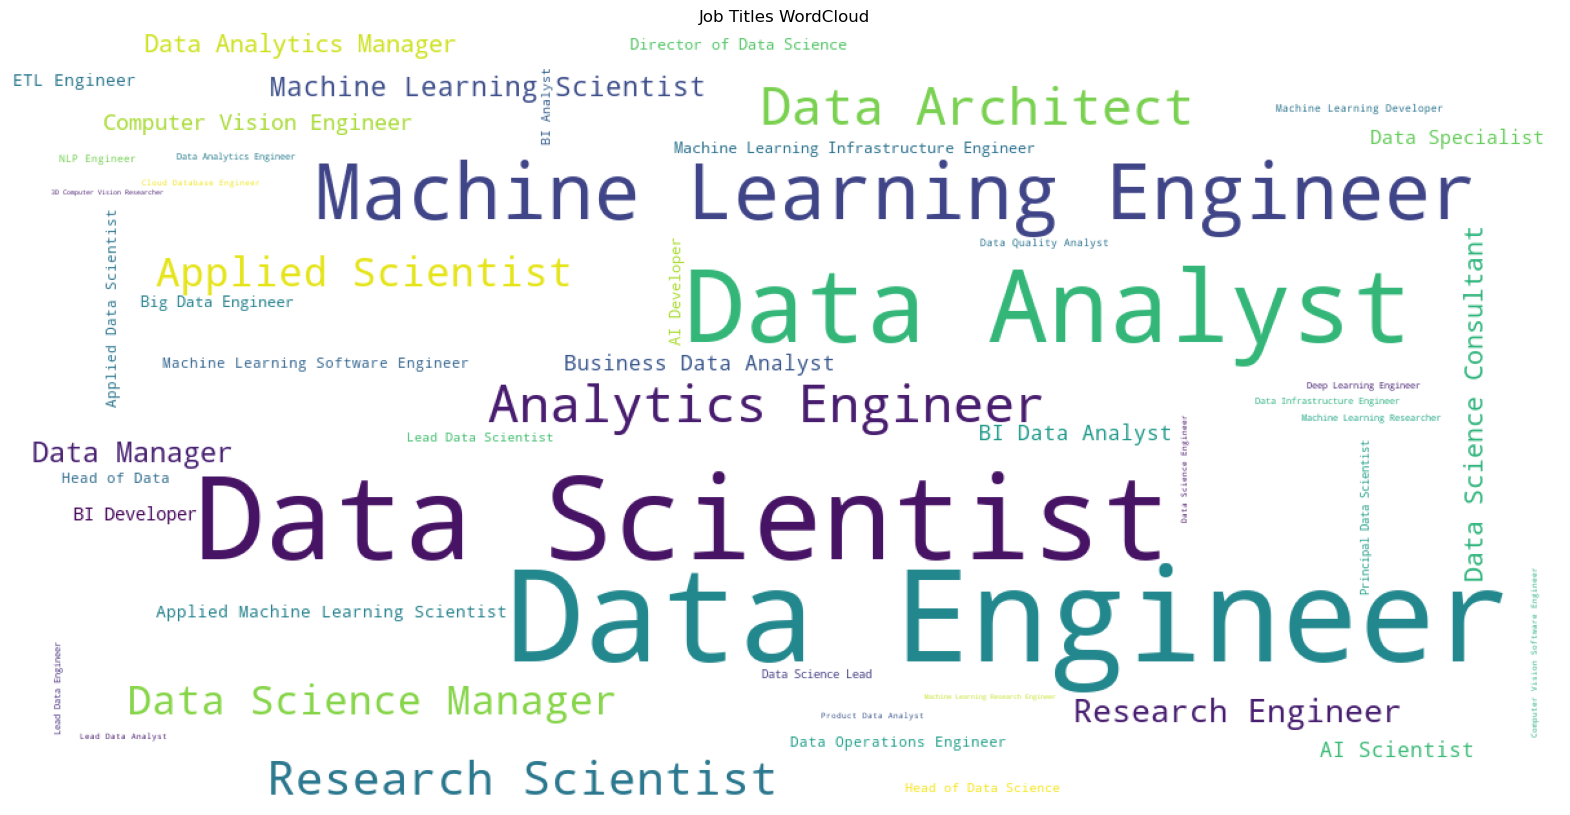

In [43]:
plt.figure(figsize=(20, 15))
wcloud = WordCloud(width=1200,
                   height=600,
                   background_color='white',
                   max_font_size=100,
                   max_words=50)
wcloud.generate_from_frequencies(data)

plt.imshow(wcloud)
plt.title('Job Titles WordCloud')
plt.axis('off')
plt.show()

### Relation between Employee residence and Company Location

In [44]:
country = coco.convert(names=df['employee_residence'],
                       to='ISO3')

df['employee_residence'] = country

0       ESP
1       USA
2       USA
3       CAN
4       CAN
       ... 
3750    USA
3751    USA
3752    USA
3753    USA
3754    IND
Name: employee_residence, Length: 3755, dtype: object


In [52]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale='Greens',
                    title='Employee Locations')

fig.show()

In [55]:
top_emp = residence[:15]

fig = px.bar(x=top_emp.index,
            y=top_emp.values,
            text=top_emp.values,
            color=top_emp.index,
            title='Top 15 Employees Locations')

fig.update_xaxes(title='Location')
fig.update_yaxes(title='Count')

fig.show()

In [62]:
country = coco.convert(df['company_location'])
df['company_location'] = country
locations = df['company_location'].value_counts()
top_comp = locations[:15]

fig = go.Figure(data=[
                    go.Bar(name='Employee Residence',
                           x=top_emp.index,
                           y=top_emp.values,
                           text=top_emp.values),
                    go.Bar(name='Company Location',
                           x=top_comp.index,
                           y=top_comp.values,
                           text=top_comp.values)
                ])
fig.update_layout(barmode='group',
                  title='Comparison Employee residence and Company Location')

fig.show()

### Company Size

In [63]:
size_groups = df['company_size'].value_counts()

fig = px.bar(x=size_groups.index,
             y=size_groups.values,
             text=size_groups.values,
             color=size_groups.index)

fig.show()